# Importing Libraries 📥

In [1]:
pip install scikit-learn==0.22.1

     |████████████████████████████████| 7.1MB 2.8MB/s 
ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.6.1 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.18.1 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.22.1 which is incompatible.
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.22.1 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.3 which is incompatible.
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packa

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles #to create intersection graphs
import matplotlib.pyplot as plt #to plot show the charts
import seaborn as sns
from scipy import stats
import string
import re
import nltk
import sklearn
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
stop_words=set(stopwords.words("english"))
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

from itertools import chain

from sklearn.metrics import accuracy_score, precision_score, recall_score ,confusion_matrix ,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


from nltk import word_tokenize
from nltk.probability import FreqDist


from scipy.sparse import hstack

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


import pickle

from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam

from sklearn.ensemble import RandomForestClassifier

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using TensorFlow backend.


/kaggle/input/badwords/full-list-of-bad-words_csv-file_2018_07_30.csv
/kaggle/input/goodwords3/goodwords.xlsx
/kaggle/input/email-classificationnlp/train
/kaggle/input/email-classificationnlp/test1


### Importing Data

In [3]:
data = pd.read_csv('../input/email-classificationnlp/train')

In [4]:
data.tail(5)

,Unnamed: 0,filename,Message-ID,content,Class
33648,21243,baughman-d/all_documents/344.,<10831684.1075848319565.JavaMail.evans@thyme>,Attached is FERC authorization for EPMI and EE...,Non Abusive
33649,45891,campbell-l/discussion_threads/34.,<28840366.1075851895047.JavaMail.evans@thyme>,"Larry,\nIn the latest conversation with Harold...",Non Abusive
33650,42613,buy-r/sent_items/164.,<26862630.1075863358930.JavaMail.evans@thyme>,This is fine by me. Rick Buy,Non Abusive
33651,43567,campbell-l/all_documents/1231.,<3478277.1075857856811.JavaMail.evans@thyme>,"You guys are a class act, and we're glad you ...",Non Abusive
33652,2732,rogers-b/discussion_threads/1413.,<18671042.1075857212103.JavaMail.evans@thyme>,______________________________________________...,Abusive


In [5]:
print(data.content[33627])

So how do you say "bitch" in Spanish?


In [6]:
submission = pd.read_csv('../input/email-classificationnlp/test1')

![](http://)![](http://)### importing list of good and bad words

In [7]:
bad = pd.read_csv("/kaggle/input/badwords/full-list-of-bad-words_csv-file_2018_07_30.csv")
good = pd.read_excel("/kaggle/input/goodwords3/goodwords.xlsx")

In [8]:
bad["content"] = bad.iloc[:,0]
good["content"] = good.iloc[:,0]

In [9]:
bad["Class"] = "Abusive"
good["Class"] = "Non Abusive"

In [10]:
bad = bad.iloc[:,1:3]
good = good.iloc[:,1:3]
bad.head()

,content,Class
0,acrotomophilia;;;;;;,Abusive
1,aeolus;;;;;;,Abusive
2,ahole;;;;;;,Abusive
3,alabama hot pocket;;;;;;,Abusive
4,alaskan pipeline;;;;;;,Abusive


In [11]:
data2 = data.iloc[:,3:5]

In [12]:
data2.head()

,content,Class
0,Anymore details? Is the offer above or below ...,Non Abusive
1,All of the MidAmerican corrections for October...,Non Abusive
2,"Mr. Campbell,\n\nArgent has overnighted Title ...",Non Abusive
3,Damn it all to hell!\n\nWhat are you doing wit...,Non Abusive
4,Confirmation of date & time for UT Summer Anal...,Non Abusive


In [13]:
data = data2.append(bad ,ignore_index=True, verify_integrity=False, sort=None)
data = data.append(good ,ignore_index=True, verify_integrity=False, sort=None)

In [14]:
data

,content,Class
0,Anymore details? Is the offer above or below ...,Non Abusive
1,All of the MidAmerican corrections for October...,Non Abusive
2,"Mr. Campbell,\n\nArgent has overnighted Title ...",Non Abusive
3,Damn it all to hell!\n\nWhat are you doing wit...,Non Abusive
4,Confirmation of date & time for UT Summer Anal...,Non Abusive
...,...,...
37345,youthful,Non Abusive
37346,zeal,Non Abusive
37347,zenith,Non Abusive
37348,zest,Non Abusive


# EDA

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37350 entries, 0 to 37349
Data columns (total 2 columns):
content    37350 non-null object
Class      37350 non-null object
dtypes: object(2)
memory usage: 583.7+ KB


In [16]:
data.dtypes

content    object
Class      object
dtype: object

In [17]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14423 entries, 0 to 14422
Data columns (total 4 columns):
Unnamed: 0    14423 non-null int64
filename      14423 non-null object
Message-ID    14423 non-null object
content       14423 non-null object
dtypes: int64(1), object(3)
memory usage: 450.8+ KB


In [18]:
data.head(25)

,content,Class
0,Anymore details? Is the offer above or below ...,Non Abusive
1,All of the MidAmerican corrections for October...,Non Abusive
2,"Mr. Campbell,\n\nArgent has overnighted Title ...",Non Abusive
3,Damn it all to hell!\n\nWhat are you doing wit...,Non Abusive
4,Confirmation of date & time for UT Summer Anal...,Non Abusive
5,actually a terrible game. bonds didnt get a b...,Non Abusive
6,the bucket - that is a great name\n\n\n\n\nBRI...,Non Abusive
7,Following please find the Daily excelrOnline E...,Non Abusive
8,I will be at the Hyatt tomorrow for the all-em...,Non Abusive
9,"Your passwords are extended, or if you did not...",Non Abusive


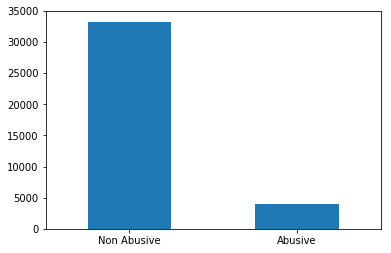

In [19]:
data['Class'].value_counts().plot(kind="bar", rot=0)

In [20]:
data['Class'].value_counts()

Non Abusive    33291
Abusive         4059
Name: Class, dtype: int64

# Cleaning Dataset

### Removing links, punctuations , numbers ,one and two letter words, etc

In [21]:
data["cleaned"] = data.content.apply(lambda x: re.sub(r'http\S+', '', x))
data.cleaned = data.cleaned.apply(lambda x : re.sub("[^A-Za-z" "]+"," ",x).lower())
data.cleaned = data.cleaned.apply(lambda x : re.sub("[0-9" "]+"," ",x))
data.cleaned = data.cleaned.apply(lambda x : re.sub(r'(?:^| )\w(?:$| )', ' ', x).strip())

data.cleaned = data.cleaned.str.replace('re',' ')
data.cleaned = data.cleaned.str.replace('original message',' ')
data.cleaned = data.cleaned.str.replace('from',' ')
data.cleaned = data.cleaned.str.replace('excelr',' ')
data.cleaned = data.cleaned.str.replace('subject',' ')

In [22]:
data.tail()

,content,Class,cleaned
37345,youthful,Non Abusive,youthful
37346,zeal,Non Abusive,zeal
37347,zenith,Non Abusive,zenith
37348,zest,Non Abusive,zest
37349,zippy,Non Abusive,zippy


> ### Cleaning the submission data

In [23]:
submission["cleaned"] = submission.content.apply(lambda x: re.sub(r'http\S+', '', x))
submission.cleaned = submission.cleaned.apply(lambda x : re.sub("[^A-Za-z" "]+"," ",x).lower())
submission.cleaned = submission.cleaned.apply(lambda x : re.sub("[0-9" "]+"," ",x))
submission.cleaned = submission.cleaned.apply(lambda x : re.sub(r'(?:^| )\w(?:$| )', ' ', x).strip())

submission.cleaned = submission.cleaned.str.replace('re',' ')
submission.cleaned = submission.cleaned.str.replace('original message',' ')
submission.cleaned = submission.cleaned.str.replace('from',' ')
submission.cleaned = submission.cleaned.str.replace('excelr',' ')
submission.cleaned = submission.cleaned.str.replace('subject',' ')

### Cleaning the submission data

In [24]:
data.content[114]

'Did you mean to have an attachment to this e:mail ?  There was not one \nattached.  '

In [25]:
data.cleaned[114]

'did you mean to have an attachment to this mail the  was not one attached'

In [26]:
submission.content[114]

'NOTE:  YOU WILL RECEIVE THIS MESSAGE EACH TIME YOU ARE SELECTED AS A REVIEWER.\n\n\nYou have been selected to participate in the Mid-Year 2000 Performance \nManagement process by providing meaningful feedback on specific employee(s) \nthat have been identified for you.  Your feedback plays an important role in \nthe performance management process, and your participation is very critical \nto the success of excelr\'s Performance Management goals.\n\nPlease provide feedback on the employee(s) listed below by accessing the \nPerformance Management System (PEP) and completing an online feedback form as \ndescribed in the "Performance Management Quick Reference Guide".  You may \nbegin your feedback input immediately.  Please have all feedback forms \ncompleted by the date noted below.\n\nIf you have any questions regarding PEP or your responsibility in the \nprocess, please call the PEP Help Desk at the following numbers:\n\nIn the U.S.:  1-713-853-4777, Option 4\nIn Europe:  44-207-783-4

In [27]:
submission.cleaned[114]

'note you will  ceive this message each time you a  selected as  viewer you have been selected to participate in the mid year performance management process by providing meaningful feedback on specific employee that have been identified for you your feedback plays an important role in the performance management process and your participation is very critical to the success of   performance management goals please provide feedback on the employee listed below by accessing the performance management system pep and completing an online feedback form as described in the performance management quick  fe nce guide you may begin your feedback input immediately please have all feedback forms completed by the date noted below if you have any questions  garding pep or your  sponsibility in the process please call the pep help desk at the following numbers in the s option in europe option in canada canada employees only or mail your questions to perfmgmt   com thank you for your participation in 

# Word Tokenization

In [28]:
def token(text):
    tokenized_word=word_tokenize(text)
    return tokenized_word


In [29]:
tokenized_word = token(data.cleaned[3])
print(tokenized_word)

['damn', 'it', 'all', 'to', 'hell', 'what', 'a', 'you', 'doing', 'with', 'my', 'inheritance', 'we', 'enjoyed', 'the', 'dinner', 'as', 'well', 'we', 'a', 'available', 'whenever', 'you', 'would', 'like', 'to', 'join', 'us', 'we', 'should', 'do', 'it', 'at', 'least', 'bi', 'weekly', 'work', 'is', 'good', 'have', 'had', 'p', 'tty', 'good', 'month', 'thus', 'far', 'knock', 'on', 'wood', 'how', 'a', 'things', 'going', 'with', 'you', 'your', 'loving', 'son', 'k', 'bass', 'daphneco', 'bigplanet', 'com', 'on', 'am', 'please', 'spond', 'to', 'bass', 'daphneco', 'bigplanet', 'com', 'to', 'eric', 'bass', 'com', 'cc', 'friday', 'hi', 'eric', 'we', 'su', 'enjoyed', 'being', 'with', 'you', 'and', 'your', 'lovely', 'shanna', 'friday', 'evening', 'we', 'should', 'do', 'that', 'mo', 'often', 'how', 'is', 'your', 'day', 'going', 'work', 'al', 'hard', 'because', 'we', 've', 'lost', 'all', 'of', 'your', 'inheritance', 'lu', 'eric', 'bass', 'com', 'to', 'lwbthemarine', 'bigplanet', 'com', 'daphneco', 'bigpl

Applying Tokenization in whole data

In [30]:
data["tokenized"] = data.cleaned.apply(token)

In [31]:
print(data.cleaned[3])

damn it all to hell what a  you doing with my inheritance we enjoyed the dinner as well we a  available whenever you would like to join us we should do it at least bi weekly work is good have had p tty good month thus far knock on wood how a  things going with you your loving son k bass daphneco bigplanet com on am please  spond to bass daphneco bigplanet com to eric bass   com cc     friday hi eric we su  enjoyed being with you and your lovely shanna friday evening we should do that mo  often how is your day going work  al hard because we ve lost all of your inheritance lu     eric bass   com to lwbthemarine bigplanet com daphneco bigplanet com sent thursday november am   friday what a  you doing for dinner tomorrow would you like to meet up with shanna and somewhe  let me know


## Removing Stopwords

In [32]:
def stop(tokenized_word):
    filtered_sent=[]
    for w in tokenized_word:
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent
    
filtered_sent = stop(data.tokenized[3])
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['damn', 'hell', 'inheritance', 'enjoyed', 'dinner', 'well', 'available', 'whenever', 'would', 'like', 'join', 'us', 'least', 'bi', 'weekly', 'work', 'good', 'p', 'tty', 'good', 'month', 'thus', 'far', 'knock', 'wood', 'things', 'going', 'loving', 'son', 'k', 'bass', 'daphneco', 'bigplanet', 'com', 'please', 'spond', 'bass', 'daphneco', 'bigplanet', 'com', 'eric', 'bass', 'com', 'cc', 'friday', 'hi', 'eric', 'su', 'enjoyed', 'lovely', 'shanna', 'friday', 'evening', 'mo', 'often', 'day', 'going', 'work', 'al', 'hard', 'lost', 'inheritance', 'lu', 'eric', 'bass', 'com', 'lwbthemarine', 'bigplanet', 'com', 'daphneco', 'bigplanet', 'com', 'sent', 'thursday', 'november', 'friday', 'dinner', 'tomorrow', 'would', 'like', 'meet', 'shanna', 'somewhe', 'let', 'know']


## Applying this in whole data

In [33]:
data.tokenized = data.tokenized.apply(stop)

## Lemmatization

In [34]:
def lem(filtered_sent):
    lem_words = []
    lem = WordNetLemmatizer()
    
    for w in filtered_sent:
        lem_words.append(lem.lemmatize(w,"v"))
    return lem_words
    
lem_words = lem(data.tokenized[3])
print("Lemmatized Sentence:",lem_words)

Lemmatized Sentence: ['damn', 'hell', 'inheritance', 'enjoy', 'dinner', 'well', 'available', 'whenever', 'would', 'like', 'join', 'us', 'least', 'bi', 'weekly', 'work', 'good', 'p', 'tty', 'good', 'month', 'thus', 'far', 'knock', 'wood', 'things', 'go', 'love', 'son', 'k', 'bass', 'daphneco', 'bigplanet', 'com', 'please', 'spond', 'bass', 'daphneco', 'bigplanet', 'com', 'eric', 'bass', 'com', 'cc', 'friday', 'hi', 'eric', 'su', 'enjoy', 'lovely', 'shanna', 'friday', 'even', 'mo', 'often', 'day', 'go', 'work', 'al', 'hard', 'lose', 'inheritance', 'lu', 'eric', 'bass', 'com', 'lwbthemarine', 'bigplanet', 'com', 'daphneco', 'bigplanet', 'com', 'send', 'thursday', 'november', 'friday', 'dinner', 'tomorrow', 'would', 'like', 'meet', 'shanna', 'somewhe', 'let', 'know']


In [35]:
data.tokenized = data.tokenized.apply(lem)

**### Combining all rows into single tokenized list

In [36]:
combined = []
data.tokenized.apply(lambda x : combined.append(x))

combined = list(chain.from_iterable(combined))

In [37]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [38]:
filtered = []
for w in combined:
    if w in words:
        filtered.append(w)


In [39]:

fdist = FreqDist(filtered)
fdist.most_common(100)

[('font', 22891),
 ('p', 22848),
 ('please', 22367),
 ('time', 19675),
 ('get', 18537),
 ('would', 17307),
 ('send', 17263),
 ('f', 16495),
 ('thank', 15374),
 ('new', 15248),
 ('go', 15165),
 ('corp', 15059),
 ('e', 14473),
 ('know', 14317),
 ('meet', 13837),
 ('one', 13658),
 ('mo', 13514),
 ('g', 13049),
 ('need', 13045),
 ('make', 12924),
 ('mail', 12700),
 ('week', 12659),
 ('port', 12654),
 ('say', 12428),
 ('may', 12350),
 ('trade', 12350),
 ('work', 12195),
 ('forward', 12136),
 ('market', 12127),
 ('call', 11233),
 ('company', 10750),
 ('th', 10638),
 ('see', 10623),
 ('right', 10437),
 ('image', 10350),
 ('like', 10330),
 ('sally', 10273),
 ('us', 10169),
 ('price', 9866),
 ('view', 9826),
 ('gas', 9764),
 ('information', 9714),
 ('team', 9651),
 ('size', 9610),
 ('date', 9540),
 ('c', 9437),
 ('schedule', 9369),
 ('take', 9368),
 ('day', 9303),
 ('let', 9221),
 ('think', 9126),
 ('game', 9007),
 ('use', 8863),
 ('also', 8847),
 ('business', 8739),
 ('service', 8672),
 ('bass

## Frequency Distribution Plot

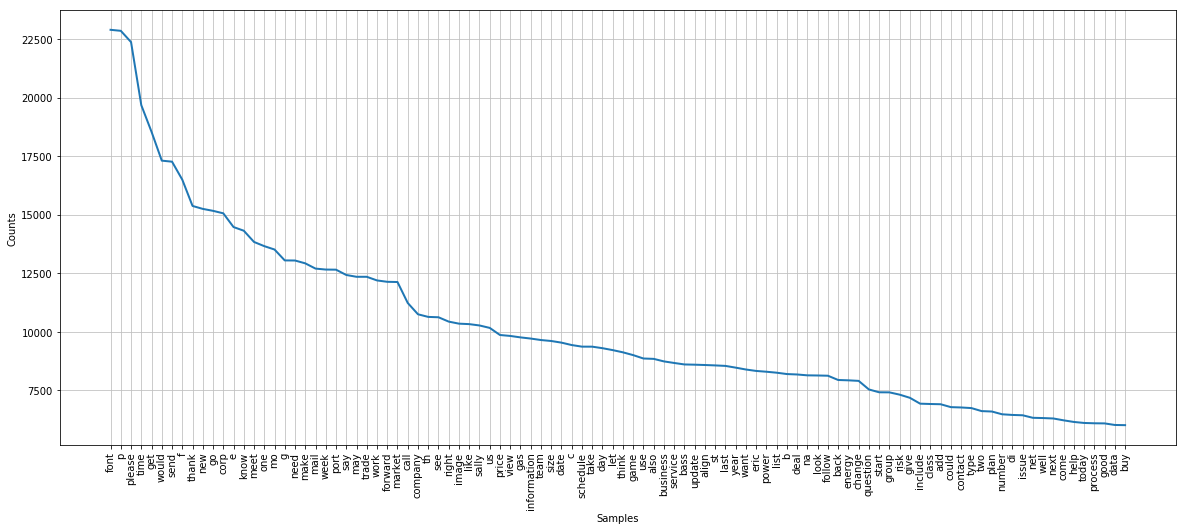

In [40]:
plt.figure(figsize=[20,8])
fdist.plot(100,cumulative=False)
plt.show()

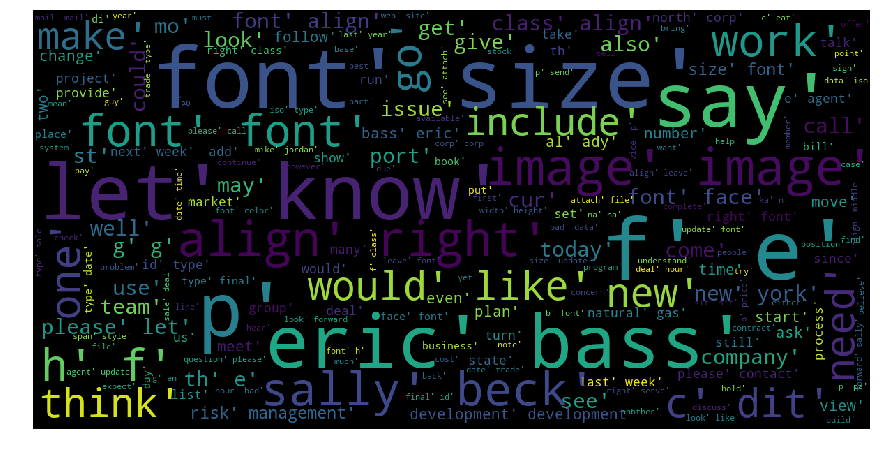

In [41]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(filtered)

# Model Building

## 1. Naive bayes

In [42]:

X_train, X_test, y_train, y_test = train_test_split(data.cleaned, data.Class, random_state=1)
cv = CountVectorizer(strip_accents="ascii", token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", lowercase=True, stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [43]:
print(X_train_cv)

  (0, 50519)	1
  (0, 8595)	1
  (1, 18244)	1
  (1, 68574)	1
  (1, 58939)	1
  (1, 59366)	1
  (1, 38034)	1
  (1, 17551)	1
  (1, 24272)	1
  (1, 89464)	1
  (1, 53568)	3
  (1, 70059)	1
  (1, 8424)	1
  (1, 26043)	2
  (1, 62041)	3
  (1, 74017)	1
  (1, 86091)	1
  (1, 39969)	1
  (1, 37704)	1
  (1, 23725)	1
  (1, 39315)	2
  (1, 87338)	1
  (1, 17913)	1
  (1, 3597)	1
  (1, 13052)	1
  :	:
  (28011, 2497)	2
  (28011, 60732)	2
  (28011, 27855)	1
  (28011, 27004)	1
  (28011, 35567)	1
  (28011, 56831)	1
  (28011, 73036)	2
  (28011, 47078)	1
  (28011, 11422)	1
  (28011, 72170)	3
  (28011, 66842)	1
  (28011, 75181)	1
  (28011, 5301)	1
  (28011, 51835)	1
  (28011, 10384)	1
  (28011, 73873)	1
  (28011, 70064)	1
  (28011, 21400)	1
  (28011, 41653)	1
  (28011, 6976)	1
  (28011, 61444)	1
  (28011, 51861)	1
  (28011, 5307)	1
  (28011, 55528)	1
  (28011, 11654)	1


In [44]:
pickle.dump(cv, open("vectorizer.pkl", "wb"))

Non Abusive    24950
Abusive         3062
Name: Class, dtype: int64
Non Abusive    8341
Abusive         997
Name: Class, dtype: int64


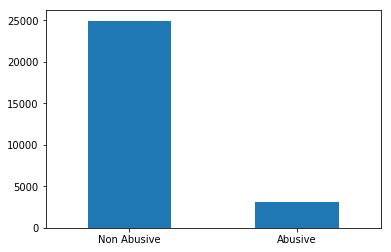

In [45]:
y_train.value_counts().plot(kind="bar", rot=0)
print(y_train.value_counts())
print(y_test.value_counts())

In [46]:

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [47]:
print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Precision score: ", precision_score(y_test, predictions ,average="binary", pos_label="Abusive"))
print("Recall score: ", recall_score(y_test, predictions , average="binary", pos_label="Abusive"))
confusion_matrix(y_test, predictions)

Accuracy score:  0.939815806382523
Precision score:  0.8193832599118943
Recall score:  0.559679037111334


array([[ 558,  439],
       [ 123, 8218]])

In [48]:
### 

### Adding a List of bad words to the dataset

In [49]:
bad = pd.read_csv("/kaggle/input/bad-word/full-list-of-bad-words_csv-file_2018_07_30.csv",deli)

NameError: name 'deli' is not defined

### TFIDF Vectorization

In [50]:
all_text=data['cleaned']
train_text=data['cleaned']
y=data['Class']
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


## 2. Random Forest

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [52]:
rf_accuracy=accuracy_score(preds,y_test)
print("Random Forest Model accuracy",rf_accuracy)
print("Precision score: ", precision_score(y_test, preds ,average="binary", pos_label="Abusive"))
print("Recall score: ", recall_score(y_test, preds , average="binary", pos_label="Abusive"))
print(confusion_matrix(y_test, preds))

Random Forest Model accuracy 0.9676929941990183
Precision score:  0.9560439560439561
Recall score:  0.7505882352941177
[[ 957  318]
 [  44 9886]]


In [53]:
# save the classifier
with open('../working/model1.pkl', 'wb') as fid:
    pickle.dump(classifier, fid)    

#Saving vectorizer
pickle.dump(word_vectorizer, open("wvector.pkl", "wb"))
pickle.dump(char_vectorizer, open("cvector.pkl", "wb"))

In [54]:
pickle.dump(char_vectorizer, open("cvector1.pkl", "wb"))

## 3. XGBoost

In [55]:
xgb=xgb.XGBClassifier()

In [56]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
preds2=xgb.predict(X_test)

In [58]:
xgb_accuracy=accuracy_score(preds2,y_test)

In [59]:
print("XGBoost Model accuracy", xgb_accuracy)
print("Recall score: ", recall_score(y_test, preds2 , average="binary", pos_label="Abusive"))
print("Precision score: ", precision_score(y_test, preds2 ,average="binary", pos_label="Abusive"))
print("F1 SCORE MACRO : ", f1_score(y_test, preds2, average='macro'))
print("F1 SCORE MICRO : ",f1_score(y_test, preds2, average='micro'))
print("F1 SCORE WEIGHTED : ",f1_score(y_test, preds2, average='weighted'))
print("F1 SCORE None : ",f1_score(y_test, preds2, average=None))
print(confusion_matrix(y_test, preds2))

XGBoost Model accuracy 0.9344935296742526
Recall score:  0.4392156862745098
Precision score:  0.9671848013816926
F1 SCORE MACRO :  0.7841959544091726
F1 SCORE MICRO :  0.9344935296742526
F1 SCORE WEIGHTED :  0.9233067996577307
F1 SCORE None :  [0.60409924 0.96429266]
[[ 560  715]
 [  19 9911]]


## 4. Deep Learning

In [60]:
data.loc[data['Class'] == 'Abusive', 'class1'] = 1
data.loc[data['Class'] != 'Abusive' , 'class1'] = 0


In [61]:
train_text, test_text, train_y, test_y = train_test_split(data['cleaned'],data['class1'],test_size = 0.2)

In [62]:
MAX_NB_WORDS = 200000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 93782 unique tokens.


In [63]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (29880, 200)
Shape of data test tensor: (7470, 200)


In [64]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [66]:
model.fit(x_train, train_y,
          batch_size=3000,
          epochs=1,
          validation_data=(x_test, test_y))

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 29880 samples, validate on 7470 samples
Epoch 1/1
29880/29880 [==============================] - 5s 151us/step - loss: 0.5757 - accuracy: 0.8470 - val_loss: 0.4326 - val_accuracy: 0.8905


In [67]:
pred3 = model.predict(x_test)

In [68]:
pred3_class = []
for i in range(len(pred3)):
    if pred3[i] > 0.5:
        pred3_class.append(1)
    else :
        pred3_class.append(0)

In [69]:
preds3_class = np.array(pred3_class)

In [70]:
deep_accuracy=accuracy_score(preds3_class,test_y)
print("Deep learning Model accuracy",deep_accuracy )
print("Recall score: ", recall_score(test_y, preds3_class , average="binary", pos_label=1))
print("Precision score: ", precision_score(test_y, preds3_class ,average="binary", pos_label=1))
print("F1 SCORE MACRO : ", f1_score(test_y, preds3_class, average='macro'))
print("F1 SCORE MICRO : ",f1_score(test_y, preds3_class, average='micro'))
print("F1 SCORE WEIGHTED : ",f1_score(test_y, preds3_class, average='weighted'))
print("F1 SCORE None : ",f1_score(test_y,preds3_class, average=None))
confusion_matrix(test_y,preds3_class)


Deep learning Model accuracy 0.8904953145917002
Recall score:  0.0
Precision score:  0.0
F1 SCORE MACRO :  0.47103809658688567
F1 SCORE MICRO :  0.8904953145917002
F1 SCORE WEIGHTED :  0.8389144360096287
F1 SCORE None :  [0.94207619 0.        ]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[6652,    0],
       [ 818,    0]])

# Balancing the Data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data.cleaned, data.Class, random_state=1)

In [72]:
from sklearn.utils import resample



# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(data.cleaned, data.Class,test_size = 0.2 ,random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
NonAbusive = X[X.Class=="Non Abusive"]
Abusive = X[X.Class=="Abusive"]

# upsample minority
Abusive_upsampled = resample(Abusive,
                          replace=True, # sample with replacement
                          n_samples=len(NonAbusive), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([NonAbusive, Abusive_upsampled])

# check new class counts
upsampled.Class.value_counts()


Non Abusive    26621
Abusive        26621
Name: Class, dtype: int64

# Model building on Undersampled Data

## 1. Naive Bayes

In [73]:

X_train, X_test, y_train, y_test = train_test_split(upsampled.cleaned, upsampled.Class, random_state=1)
cv = CountVectorizer(strip_accents="ascii", token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", lowercase=True, stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [74]:
cv = CountVectorizer(strip_accents="ascii", token_pattern=u"(?ui)\\b\\w*[a-z]+\\w*\\b", lowercase=True, stop_words="english")
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


Abusive        20029
Non Abusive    19902
Name: Class, dtype: int64
Non Abusive    6719
Abusive        6592
Name: Class, dtype: int64


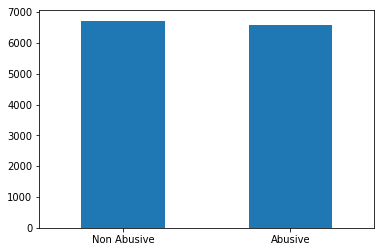

In [75]:
y_test.value_counts().plot(kind="bar", rot=0)
print(y_train.value_counts())
print(y_test.value_counts())

In [76]:
naive_bayes_und = MultinomialNB()
naive_bayes_und.fit(X_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
predictions_und = naive_bayes_und.predict(X_test_cv)

In [78]:
print("Accuracy score: ", accuracy_score(y_test, predictions_und))
print("Precision score: ", precision_score(y_test, predictions_und ,average="binary", pos_label="Abusive"))
print("Recall score: ", recall_score(y_test, predictions_und , average="binary", pos_label="Abusive"))
print("confusion_matrix",confusion_matrix(y_test, predictions_und))

Accuracy score:  0.9249492900608519
Precision score:  0.9288452691305015
Recall score:  0.9188410194174758
confusion_matrix [[6057  535]
 [ 464 6255]]


### Saving model

In [79]:
# save the classifier
with open('../working/model.pkl', 'wb') as fid:
    pickle.dump(naive_bayes_und, fid)    

#Saving vectorizer
pickle.dump(cv, open("vector.pkl", "wb"))


## 2. Deep learning

In [80]:
upsampled.loc[upsampled['Class'] == 'Abusive', 'class1'] = 1
upsampled.loc[upsampled['Class'] != 'Abusive' , 'class1'] = 0

In [81]:
train_text, test_text, train_y, test_y = train_test_split(upsampled['cleaned'],upsampled['class1'],test_size = 0.2,random_state=11)

In [82]:
MAX_NB_WORDS = 2000000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

/opt/conda/lib/python3.6/site-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 64835 unique tokens.


In [83]:
MAX_SEQUENCE_LENGTH = 200
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (42593, 200)
Shape of data test tensor: (10649, 200)


In [84]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [86]:
model.fit(x_train, train_y,
          batch_size=300,
          epochs=10,
          validation_data=(x_test, test_y))

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 42593 samples, validate on 10649 samples
Epoch 1/10
42593/42593 [==============================] - 41s 973us/step - loss: 0.2984 - binary_accuracy: 0.8738 - val_loss: 0.1139 - val_binary_accuracy: 0.9535
Epoch 2/10
42593/42593 [==============================] - 41s 959us/step - loss: 0.0658 - binary_accuracy: 0.9774 - val_loss: 0.0395 - val_binary_accuracy: 0.9922
Epoch 3/10
42593/42593 [==============================] - 40s 943us/step - loss: 0.0216 - binary_accuracy: 0.9943 - val_loss: 0.0245 - val_binary_accuracy: 0.9945
Epoch 4/10
42593/42593 [==============================] - 41s 959us/step - loss: 0.0141 - binary_accuracy: 0.9968 - val_loss: 0.0265 - val_binary_accuracy: 0.9936
Epoch 5/10
42593/42593 [==============================] - 41s 958us/step - loss: 0.0101 - binary_accuracy: 0.9973 - val_loss: 0.0259 - val_binary_accuracy: 0.9935
Epoch 6/10
42593/42593 [==============================] - 40s 941us/step - loss: 0.0099 - binary_accuracy: 0.9974 - val_loss: 0.0265 - 

### Saving model

In [87]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [88]:
my_prediction = model.predict(x_test)

In [89]:
my_prediction[67]

array([0.9961377], dtype=float32)

In [90]:
my_prediction_class = []
for i in range(len(my_prediction)):
    if my_prediction[i] > 0.5:
        my_prediction_class.append(1)
    else :
        my_prediction_class.append(0)

In [91]:
my_prediction_class = np.array(my_prediction_class)

In [92]:
deep_accuracy=accuracy_score(my_prediction_class,test_y)
print("Deep learning Model accuracy",deep_accuracy )
print("Recall score: ", recall_score(test_y, my_prediction_class , average="binary", pos_label=1))
print("Precision score: ", precision_score(test_y, my_prediction_class ,average="binary", pos_label=1))
print("F1 SCORE MACRO : ", f1_score(test_y, my_prediction_class, average='macro'))
print("F1 SCORE MICRO : ",f1_score(test_y, my_prediction_class, average='micro'))
print("F1 SCORE WEIGHTED : ",f1_score(test_y, my_prediction_class, average='weighted'))
print("F1 SCORE None : ",f1_score(test_y,my_prediction_class, average=None))

Deep learning Model accuracy 0.9929570851723166
Recall score:  0.9994242947610823
Precision score:  0.9863636363636363
F1 SCORE MACRO :  0.992955534412383
F1 SCORE MICRO :  0.9929570851723166
F1 SCORE WEIGHTED :  0.9929577624029206
F1 SCORE None :  [0.99306005 0.99285102]


## 3. Random forest

In [93]:
all_text = upsampled['cleaned']
train_text=upsampled['cleaned']
y=upsampled['Class']
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)

train_word_features = word_vectorizer.transform(train_text)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

/opt/conda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:520: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


In [94]:
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [95]:
rf_accuracy=accuracy_score(preds,y_test)
print("Random Forest Model accuracy",rf_accuracy)
print("Precision score: ", precision_score(y_test, preds ,average="binary", pos_label="Abusive"))
print("Recall score: ", recall_score(y_test, preds , average="binary", pos_label="Abusive"))
print(confusion_matrix(y_test, preds))

Random Forest Model accuracy 0.9914230263569774
Precision score:  0.9842267406038201
Recall score:  0.9988744372186094
[[7987    9]
 [ 128 7849]]


### saving model

In [96]:
# save the classifier
with open('../working/model.pkl', 'wb') as fid:
    pickle.dump(classifier, fid)    

#Saving vectorizer
pickle.dump(word_vectorizer, open("wvector.pkl", "wb"))
pickle.dump(char_vectorizer, open("cvector.pkl", "wb"))

## 4. XG Boost

In [97]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [98]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
preds2=xgb.predict(X_test)

In [100]:
xgb_accuracy=accuracy_score(preds2,y_test)
print("XGBoost Model accuracy", xgb_accuracy)
print("Recall score: ", recall_score(y_test, preds2 , average="binary", pos_label="Abusive"))
print("Precision score: ", precision_score(y_test, preds2 ,average="binary", pos_label="Abusive"))
print("F1 SCORE MACRO : ", f1_score(y_test, preds2, average='macro'))
print("F1 SCORE MICRO : ",f1_score(y_test, preds2, average='micro'))
print("F1 SCORE WEIGHTED : ",f1_score(y_test, preds2, average='weighted'))
print("F1 SCORE None : ",f1_score(y_test, preds2, average=None))
print(confusion_matrix(y_test, preds2))

XGBoost Model accuracy 0.8992049082827271
Recall score:  0.9348424212106053
Precision score:  0.8728397944885568
F1 SCORE MACRO :  0.8990685977150945
F1 SCORE MICRO :  0.8992049082827271
F1 SCORE WEIGHTED :  0.8990730098118321
F1 SCORE None :  [0.90277778 0.89535942]
[[7475  521]
 [1089 6888]]
